In [1]:
%matplotlib inline

import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /opt/conda/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

### Summary

In [2]:
Ltime2 = pd.read_pickle("./df_Ltime2.pkl")
Temperature = pd.read_pickle("./df_Temperature.pkl")

In [3]:
Ltime2

0
0  18:48
1  20:17
2  21:37
3  23:14
4  01:00

In [4]:
def min_day(time):
    """
    input
    > time : (str) represented as HH:MM 
    
    output
    > minday : (min) order of minute of the day.
    
    """
    HH, MM = time.split(":")
    
    return int(HH)*60 + int(MM)

In [5]:
min_day_s0 = Ltime2[0].apply(min_day)
min_day_s1 = min_day_s0.shift(1)

if np.where(min_day_s0 - min_day_s1 < 0)[0].any():
    next_day_flag = 1
    next_day_start = np.where(min_day_s0 - min_day_s1 < 0)[0][0]
    
if next_day_flag:
    min_day_s0[next_day_start:] = min_day_s0[next_day_start:] + 1440
    
Ltime2["min_day"] = min_day_s0


In [6]:
Ltime2

0  min_day
0  18:48     1128
1  20:17     1217
2  21:37     1297
3  23:14     1394
4  01:00     1500

In [7]:
Temperature

0
0  210.643831
1  200.612015
2  192.659258
3  219.419681
4  192.953037

In [8]:
Ltime2

0  min_day
0  18:48     1128
1  20:17     1217
2  21:37     1297
3  23:14     1394
4  01:00     1500

In [9]:
Ltime2 = Ltime2.append({0: "06:00", "min_day": 1800}, ignore_index=True)
Temperature = Temperature.append({0: Temperature[0].mean()}, ignore_index=True)

In [10]:
Ltime2

0  min_day
0  18:48     1128
1  20:17     1217
2  21:37     1297
3  23:14     1394
4  01:00     1500
5  06:00     1800

In [11]:
Temperature

0
0  210.643831
1  200.612015
2  192.659258
3  219.419681
4  192.953037
5  203.257564

In [12]:
def min_HHMM(mins):
    HH = np.where(mins < 1440, mins//60, mins//60-24)
    MM = mins % 60
    
    HHMM = list(zip(HH, MM))

    return [f"{int(hh):02d}:{int(mm):02d}" for (hh, mm) in HHMM]


In [16]:
def plot(Ltime2, Temperature):
    fig, ax = plt.subplots()
    ax.set_xlabel("Local Time")
    ax.set_ylabel("P1 (2) / P1 (4) Temperature (K)")
    ax.scatter(Ltime2["min_day"], Temperature[0], s=0)
    ax.scatter(Ltime2["min_day"].iloc[:-1], Temperature[0].iloc[:-1], s=30)
    xticks = ax.get_xticks()
    xticklabels = min_HHMM(xticks)
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticklabels)
    ax.grid(True)
    fig.autofmt_xdate()
    
    return plt.show()

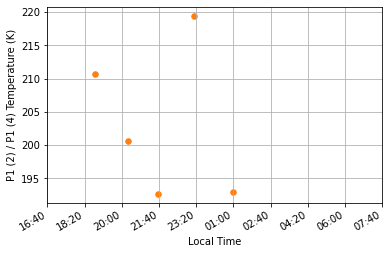

In [17]:
plot(Ltime2, Temperature)